In [1]:
import numpy as np
import os
import pandas as pd
import pickle
import pandas as pd
import numpy as np
from scipy.interpolate import Rbf
from scipy.interpolate import interpn
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import math
from math import radians, cos, sin, asin, sqrt
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

## 读取数据

In [2]:
## 读取WRF数据
with open('../data/wrf_dataset_init', 'rb') as f:
    wrf_init = pickle.load(f)

In [3]:
wrf_init.keys()

dict_keys(['time', 'u10', 'v10', 'rh2', 't2', 'slp', 'lon', 'lat', 'velocity', 'degree'])

In [4]:
## 读取Lable数据
with open('../data/real_dataset_noabnormal', 'rb') as f:
    real_target = pickle.load(f)

In [5]:
real_target.keys()

Index(['站位编号', '获取时间', '经度', '纬度', '平均风速', '平均风向', '平均风速_10m'], dtype='object')

## 构造WRF数据点

In [6]:
# WRF数据场
wrf_lon = wrf_init['lon']
wrf_lat = wrf_init['lat']
wrf_time = wrf_init['time']

wrf_velocity = wrf_init['velocity']
wrf_degree = wrf_init['degree']
wrf_u10 = wrf_init['u10']
wrf_v10 = wrf_init['v10']
wrf_rh2 = wrf_init['rh2']
wrf_t2 = wrf_init['t2']
wrf_slp = wrf_init['slp']

## 构造Real数据点

In [7]:
# 分组提取数据
df_group = real_target.groupby('站位编号')

# time
real_time_00 = df_group.get_group(0)['获取时间'].values
real_time_01 = df_group.get_group(1)['获取时间'].values
real_time_02 = df_group.get_group(2)['获取时间'].values
real_time_03 = df_group.get_group(3)['获取时间'].values

# lat
real_lat_00 = df_group.mean(numeric_only=True)['纬度'].loc[0]
real_lat_01 = df_group.mean(numeric_only=True)['纬度'].loc[1]
real_lat_02 = df_group.mean(numeric_only=True)['纬度'].loc[2]
real_lat_03 = df_group.mean(numeric_only=True)['纬度'].loc[3]

# lon
real_lon_00 = df_group.mean(numeric_only=True)['经度'].loc[0]
real_lon_01 = df_group.mean(numeric_only=True)['经度'].loc[1]
real_lon_02 = df_group.mean(numeric_only=True)['经度'].loc[2]
real_lon_03 = df_group.mean(numeric_only=True)['经度'].loc[3]

# velocity_10
real_velocity_00 = df_group.get_group(0)['平均风速_10m'].values
real_velocity_01 = df_group.get_group(1)['平均风速_10m'].values
real_velocity_02 = df_group.get_group(2)['平均风速_10m'].values
real_velocity_03 = df_group.get_group(3)['平均风速_10m'].values

# degree
real_degree_00 = df_group.get_group(0)['平均风向'].values
real_degree_01 = df_group.get_group(1)['平均风向'].values
real_degree_02 = df_group.get_group(2)['平均风向'].values
real_degree_03 = df_group.get_group(3)['平均风向'].values

## 导入插值后的数据

In [2]:
idw_00 = sio.loadmat(os.path.join('../data/', 'idw_00_100'))
idw_01 = sio.loadmat(os.path.join('../data/', 'idw_01_100'))
idw_02 = sio.loadmat(os.path.join('../data/', 'idw_02_100'))
idw_03 = sio.loadmat(os.path.join('../data/', 'idw_03_100'))

In [3]:
idw_00.keys()

dict_keys(['__header__', '__version__', '__globals__', 'idw_velocity10', 'idw_degree', 'idw_u10', 'idw_v10', 'idw_rh2', 'idw_t2', 'idw_slp'])

## 在时间轴上进行线性插值

In [9]:
# 构建一维插值实例

# 00 
interp1d_velocity10_00 = interp1d(wrf_time, idw_00['idw_velocity10'][:, 0], bounds_error=False)
interp1d_degree_00 = interp1d(wrf_time, idw_00['idw_degree'][:, 0], bounds_error=False)
interp1d_u10_00 = interp1d(wrf_time, idw_00['idw_u10'][:, 0], bounds_error=False)
interp1d_v10_00 = interp1d(wrf_time, idw_00['idw_v10'][:, 0], bounds_error=False)
interp1d_rh2_00 = interp1d(wrf_time, idw_00['idw_rh2'][:, 0], bounds_error=False)
interp1d_t2_00 = interp1d(wrf_time, idw_00['idw_t2'][:, 0], bounds_error=False)
interp1d_slp_00 = interp1d(wrf_time, idw_00['idw_slp'][:, 0], bounds_error=False)

# 01
interp1d_velocity10_01 = interp1d(wrf_time, idw_01['idw_velocity10'][:, 0], bounds_error=False)
interp1d_degree_01 = interp1d(wrf_time, idw_01['idw_degree'][:, 0], bounds_error=False)
interp1d_u10_01 = interp1d(wrf_time, idw_01['idw_u10'][:, 0], bounds_error=False)
interp1d_v10_01 = interp1d(wrf_time, idw_01['idw_v10'][:, 0], bounds_error=False)
interp1d_rh2_01 = interp1d(wrf_time, idw_01['idw_rh2'][:, 0], bounds_error=False)
interp1d_t2_01 = interp1d(wrf_time, idw_01['idw_t2'][:, 0], bounds_error=False)
interp1d_slp_01 = interp1d(wrf_time, idw_01['idw_slp'][:, 0], bounds_error=False)

# 02
interp1d_velocity10_02 = interp1d(wrf_time, idw_02['idw_velocity10'][:, 0], bounds_error=False)
interp1d_degree_02 = interp1d(wrf_time, idw_02['idw_degree'][:, 0], bounds_error=False)
interp1d_u10_02 = interp1d(wrf_time, idw_02['idw_u10'][:, 0], bounds_error=False)
interp1d_v10_02 = interp1d(wrf_time, idw_02['idw_v10'][:, 0], bounds_error=False)
interp1d_rh2_02 = interp1d(wrf_time, idw_02['idw_rh2'][:, 0], bounds_error=False)
interp1d_t2_02 = interp1d(wrf_time, idw_02['idw_t2'][:, 0], bounds_error=False)
interp1d_slp_02 = interp1d(wrf_time, idw_02['idw_slp'][:, 0], bounds_error=False)

# 03
interp1d_velocity10_03 = interp1d(wrf_time, idw_03['idw_velocity10'][:, 0], bounds_error=False)
interp1d_degree_03 = interp1d(wrf_time, idw_03['idw_degree'][:, 0], bounds_error=False)
interp1d_u10_03 = interp1d(wrf_time, idw_03['idw_u10'][:, 0], bounds_error=False)
interp1d_v10_03 = interp1d(wrf_time, idw_03['idw_v10'][:, 0], bounds_error=False)
interp1d_rh2_03 = interp1d(wrf_time, idw_03['idw_rh2'][:, 0], bounds_error=False)
interp1d_t2_03 = interp1d(wrf_time, idw_03['idw_t2'][:, 0], bounds_error=False)
interp1d_slp_03 = interp1d(wrf_time, idw_03['idw_slp'][:, 0], bounds_error=False)

In [10]:
# 插值到 观测数据时间轴
# 00
velocity10_00 = interp1d_velocity10_00(real_time_00)
degree_00 = interp1d_degree_00(real_time_00)
u10_00 = interp1d_u10_00(real_time_00)
v10_00 = interp1d_v10_00(real_time_00)
rh2_00 = interp1d_rh2_00(real_time_00)
t2_00 = interp1d_t2_00(real_time_00)
slp_00 = interp1d_slp_00(real_time_00)

# 01
velocity10_01 = interp1d_velocity10_01(real_time_01)
degree_01 = interp1d_degree_01(real_time_01)
u10_01 = interp1d_u10_01(real_time_01)
v10_01 = interp1d_v10_01(real_time_01)
rh2_01 = interp1d_rh2_01(real_time_01)
t2_01 = interp1d_t2_01(real_time_01)
slp_01 = interp1d_slp_01(real_time_01)

# 02
velocity10_02 = interp1d_velocity10_02(real_time_02)
degree_02 = interp1d_degree_02(real_time_02)
u10_02 = interp1d_u10_02(real_time_02)
v10_02 = interp1d_v10_02(real_time_02)
rh2_02 = interp1d_rh2_02(real_time_02)
t2_02 = interp1d_t2_02(real_time_02)
slp_02 = interp1d_slp_02(real_time_02)

# 03
velocity10_03 = interp1d_velocity10_03(real_time_03)
degree_03 = interp1d_degree_03(real_time_03)
u10_03 = interp1d_u10_03(real_time_03)
v10_03 = interp1d_v10_03(real_time_03)
rh2_03 = interp1d_rh2_03(real_time_03)
t2_03 = interp1d_t2_03(real_time_03)
slp_03 = interp1d_slp_03(real_time_03)

In [11]:
# 保存数据--00
sio.savemat(os.path.join('../data', 'interp_00_all.mat'), 
            {'velocity10_00': velocity10_00, 'degree_00': degree_00,  'u10_00': u10_00, 'v10_00': v10_00, 
             'rh2_00': rh2_00, 't2_00': t2_00, 'slp_00': slp_00, })

In [12]:
# 保存数据--01
sio.savemat(os.path.join('../data', 'interp_01_all.mat'), 
            {'velocity10_01': velocity10_01, 'degree_01': degree_01,  'u10_01': u10_01, 'v10_01': v10_01, 
             'rh2_01': rh2_01, 't2_01': t2_01, 'slp_01': slp_01, })

In [13]:
# 保存数据--02
sio.savemat(os.path.join('../data', 'interp_02_all.mat'), 
            {'velocity10_02': velocity10_02, 'degree_02': degree_02,  'u10_02': u10_02, 'v10_02': v10_02, 
             'rh2_02': rh2_02, 't2_02': t2_02, 'slp_02': slp_02, })

In [14]:
# 保存数据--03
sio.savemat(os.path.join('../data', 'interp_03_all.mat'), 
            {'velocity10_03': velocity10_03, 'degree_03': degree_03,  'u10_03': u10_03, 'v10_03': v10_03, 
             'rh2_03': rh2_03, 't2_03': t2_03, 'slp_03': slp_03, })

## 00

In [15]:
# 绘图参数
font_size = 15
line_width = 0.5
size = 3
nrows=2

In [16]:
# 将时间戳改为标准时间
timestamps = real_time_00 * 10**9 
datetime_index = pd.to_datetime(timestamps, unit='ns')
target_velocity_00 = pd.DataFrame(real_velocity_00, index=datetime_index)
target_degree_00 = pd.DataFrame(real_degree_00, index=datetime_index)

<Figure size 2000x800 with 0 Axes>

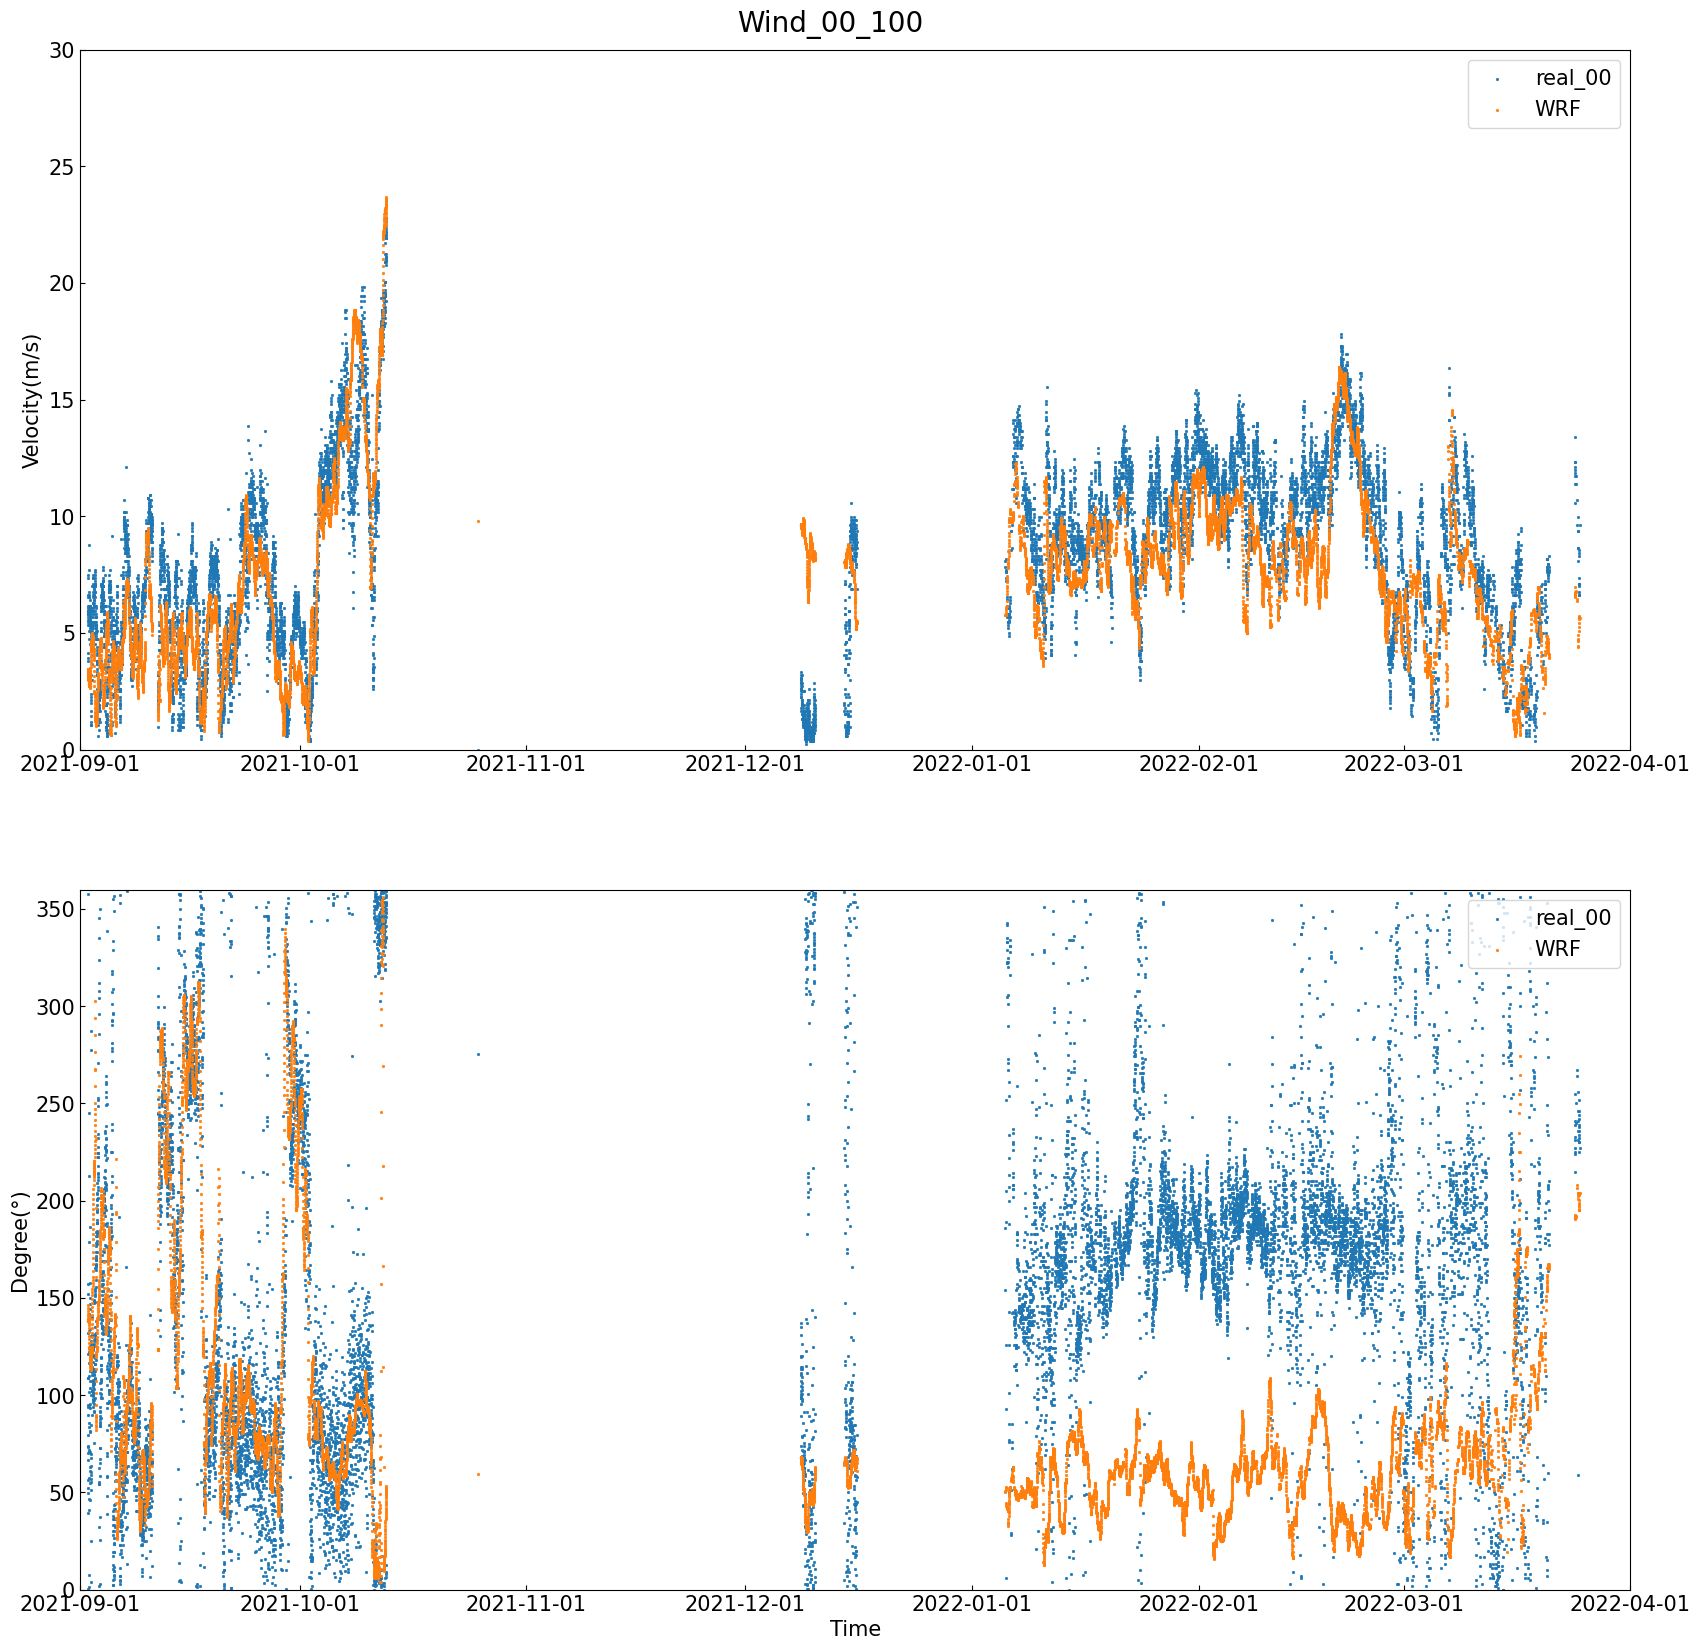

In [17]:
# 选取时间范围
xlim_start_A = pd.Timestamp('2021-09-01')
xlim_end_A = pd.Timestamp('2022-04-01')
# 设置画布大小
figsize = (20, 8)
# 创建画布
plt.figure(figsize = figsize)
# 将画布划分为1行4列
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize[0], figsize[0] / 2 * nrows))
## 全局设置
# 绘制第一幅图
axes[0].scatter(target_velocity_00.index, target_velocity_00.values, s=size, linewidth=line_width, label='real_00')
axes[0].scatter(target_velocity_00.index, velocity10_00, s=size, linewidth=line_width, label='WRF')
axes[0].set_xlim(xlim_start_A, xlim_end_A)
axes[0].set_ylim(0, 30)
axes[0].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
axes[0].autoscale_view()
axes[0].tick_params(direction='in', labelsize=15)
axes[0].set_ylabel('Velocity(m/s)', fontsize=font_size)
axes[0].legend(loc='upper right',fontsize=font_size)

# 绘制第二幅图
axes[1].scatter(target_degree_00.index, target_degree_00.values, s=size, linewidth=line_width, label='real_00')
axes[1].scatter(target_degree_00.index, degree_00, s=size, linewidth=line_width, label='WRF')
axes[1].set_xlim(xlim_start_A, xlim_end_A)
axes[1].set_ylim(0, 360)
axes[1].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
axes[1].autoscale_view()
axes[1].tick_params(direction='in', labelsize=15)
axes[1].set_xlabel('Time', fontsize=font_size)
axes[1].set_ylabel('Degree(°)', fontsize=font_size)
axes[1].legend(loc='upper right',fontsize=font_size)

fig.suptitle('Wind_00_100', fontsize=20, y=0.9) 
plt.savefig('../pic/interp_00_100', dpi=300)
plt.show()

## 01

In [19]:
# 将时间戳改为标准时间
timestamps = real_time_01 * 10**9 
datetime_index = pd.to_datetime(timestamps, unit='ns')
target_velocity_01 = pd.DataFrame(real_velocity_01, index=datetime_index)
target_degree_01 = pd.DataFrame(real_degree_01, index=datetime_index)

<Figure size 2000x800 with 0 Axes>

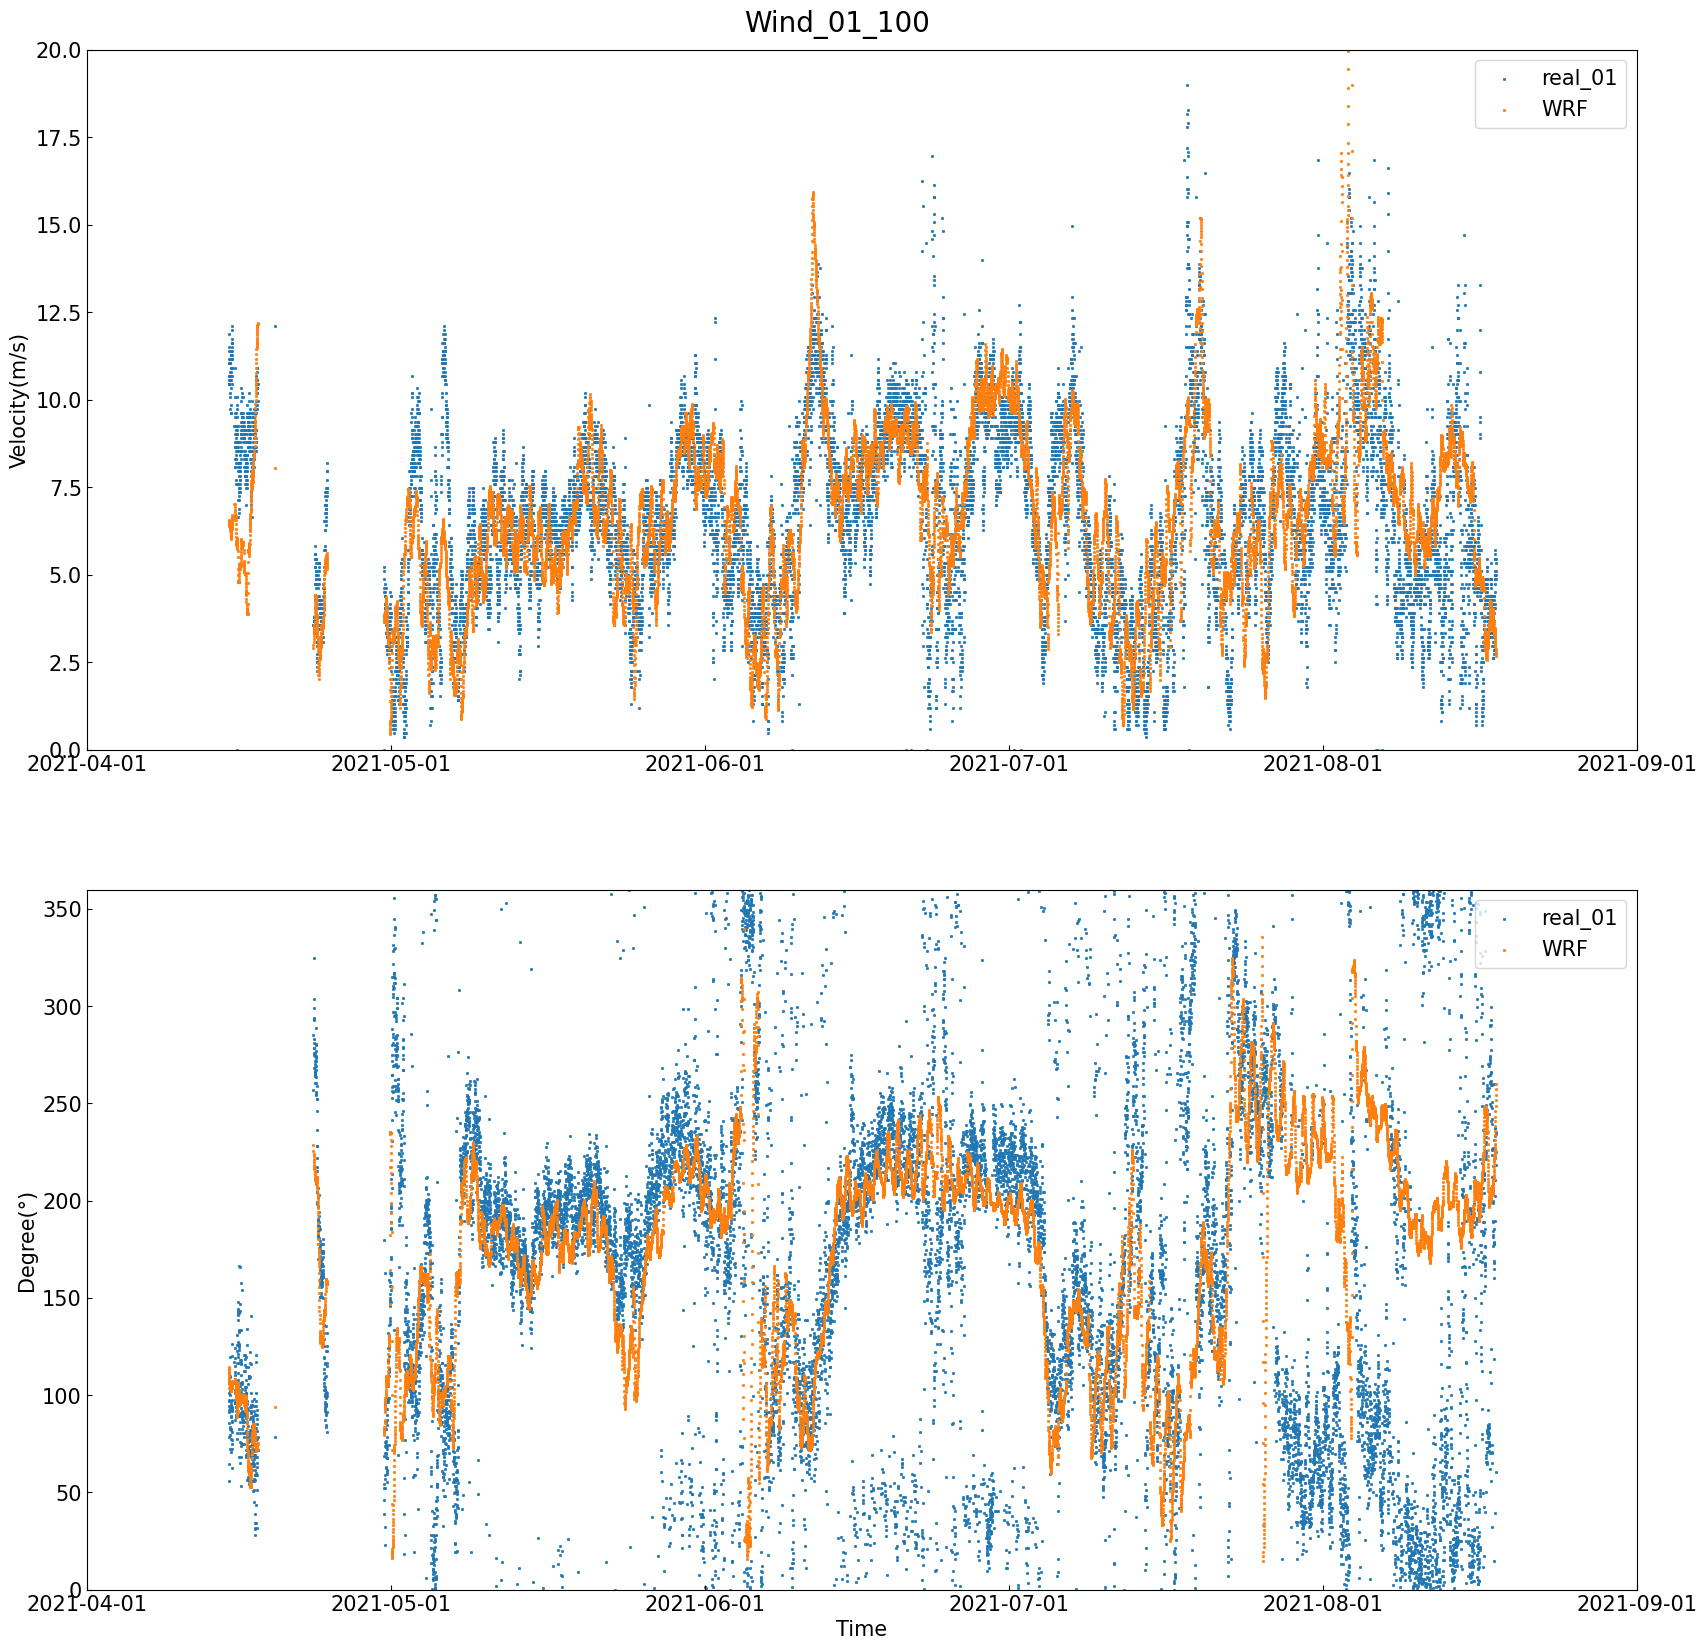

In [20]:
# 选取时间范围
xlim_start_B = pd.Timestamp('2021-04-01')
xlim_end_B = pd.Timestamp('2021-09-01')
# 设置画布大小
figsize = (20, 8)
# 创建画布
plt.figure(figsize = figsize)
# 将画布划分为1行4列
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize[0], figsize[0] / 2 * nrows))
## 全局设置
# 绘制第一幅图
axes[0].scatter(target_velocity_01.index, target_velocity_01.values, s=size, linewidth=line_width, label='real_01')
axes[0].scatter(target_velocity_01.index, velocity10_01, s=size, linewidth=line_width, label='WRF')
axes[0].set_xlim(xlim_start_B, xlim_end_B)
axes[0].set_ylim(0, 20)
axes[0].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
axes[0].autoscale_view()
axes[0].tick_params(direction='in', labelsize=15)
axes[0].set_ylabel('Velocity(m/s)', fontsize=font_size)
axes[0].legend(loc='upper right',fontsize=font_size)

# 绘制第二幅图
axes[1].scatter(target_degree_01.index, target_degree_01.values, s=size, linewidth=line_width, label='real_01')
axes[1].scatter(target_degree_01.index, degree_01, s=size, linewidth=line_width, label='WRF')
axes[1].set_xlim(xlim_start_B, xlim_end_B)
axes[1].set_ylim(0, 360)
axes[1].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
axes[1].autoscale_view()
axes[1].tick_params(direction='in', labelsize=15)
axes[1].set_xlabel('Time', fontsize=font_size)
axes[1].set_ylabel('Degree(°)', fontsize=font_size)
axes[1].legend(loc='upper right',fontsize=font_size)

fig.suptitle('Wind_01_100', fontsize=20, y=0.9) 
plt.savefig('../pic/interp_01_100', dpi=300)
plt.show()

## 02

In [21]:
# 将时间戳改为标准时间
timestamps = real_time_02 * 10**9 
datetime_index = pd.to_datetime(timestamps, unit='ns')
target_velocity_02 = pd.DataFrame(real_velocity_02, index=datetime_index)
target_degree_02 = pd.DataFrame(real_degree_02, index=datetime_index)

<Figure size 2000x800 with 0 Axes>

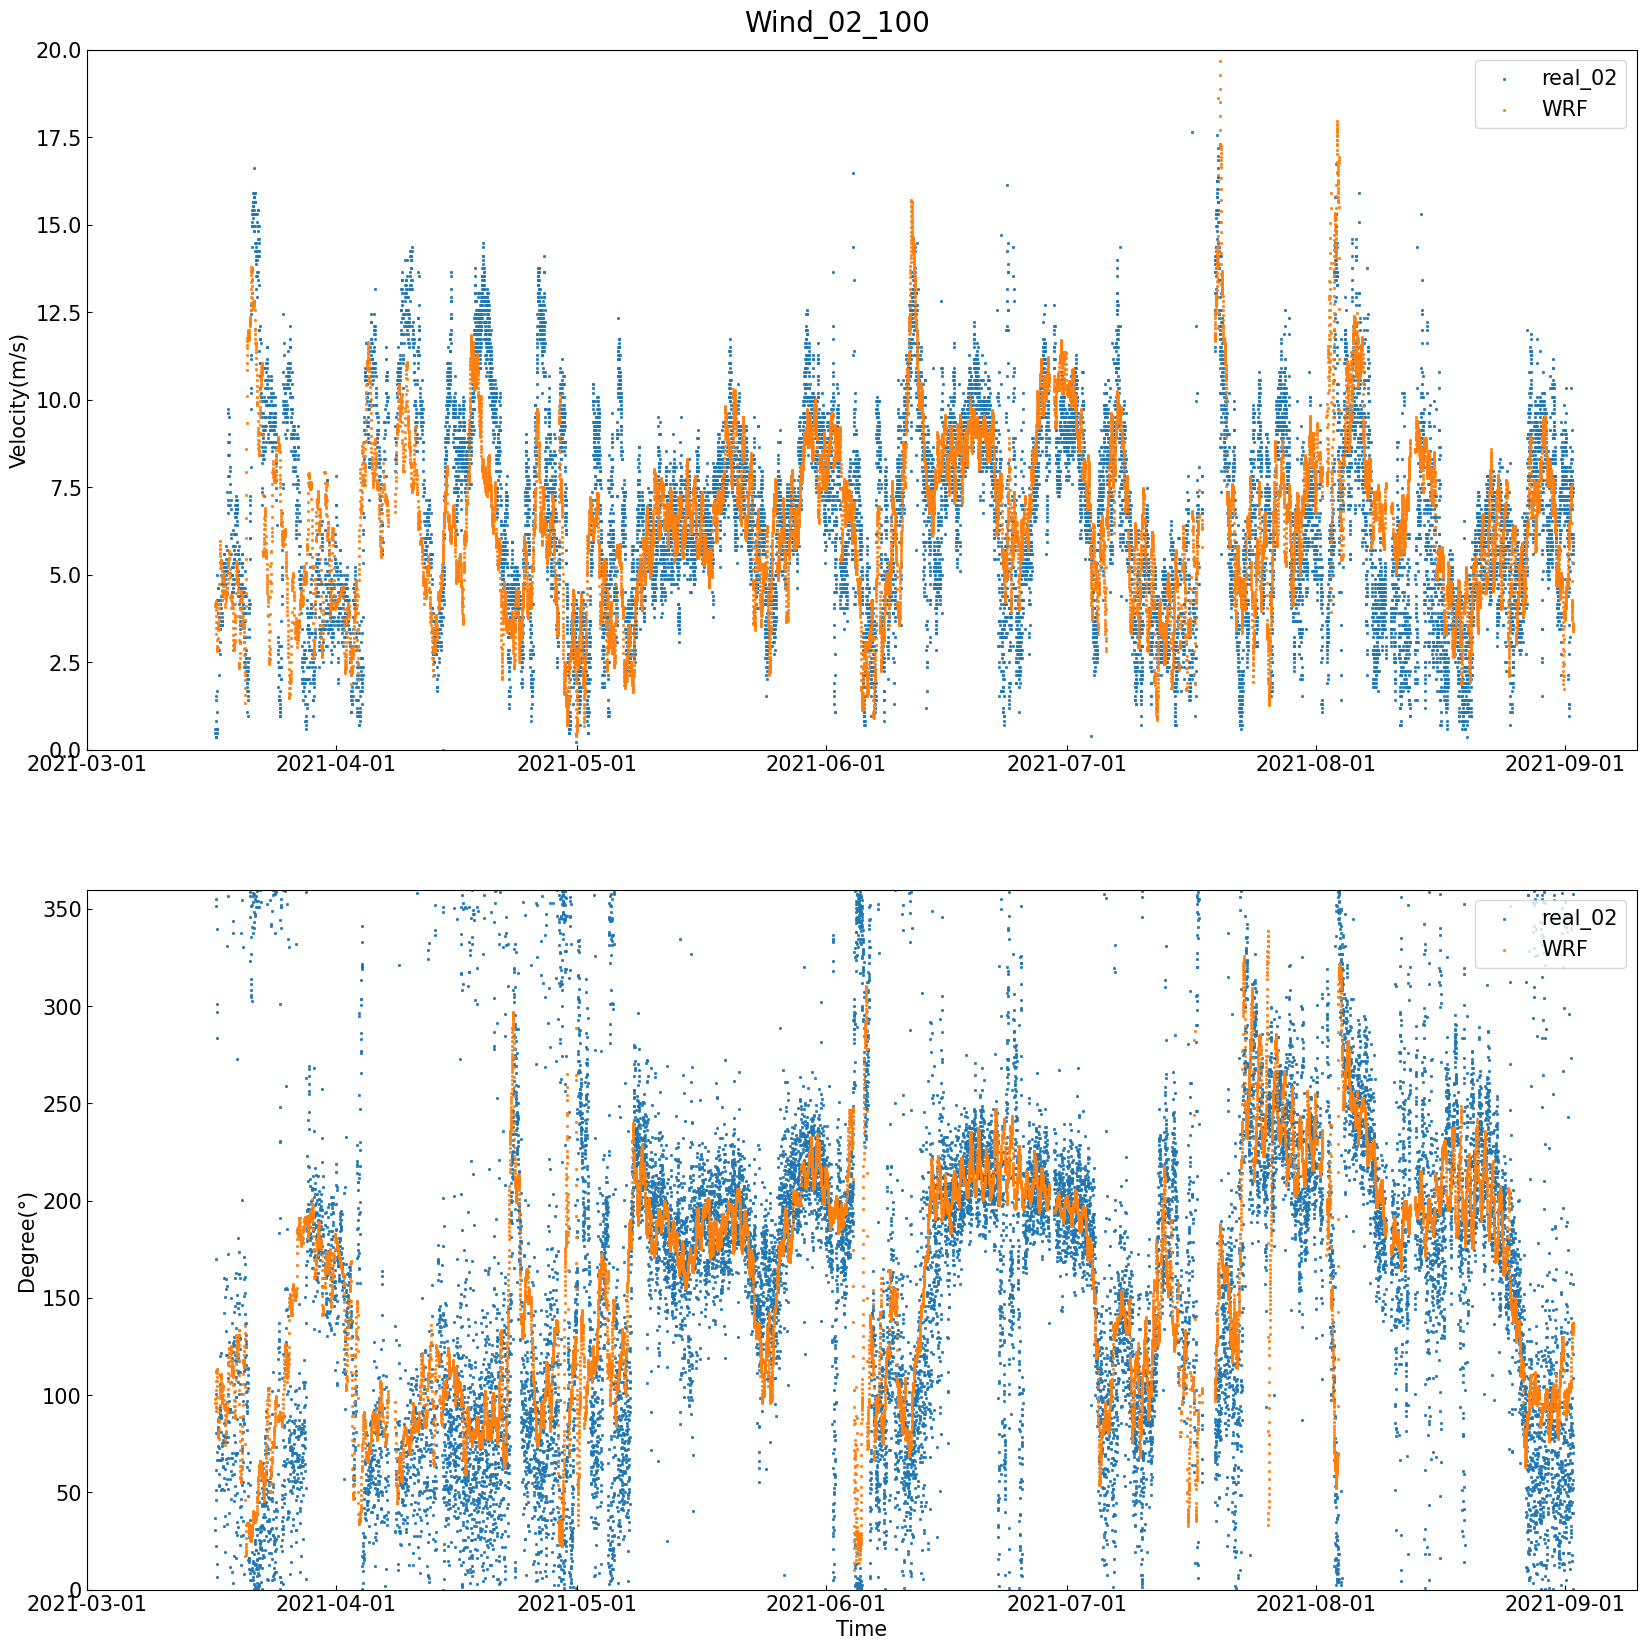

In [22]:
# 选取时间范围
xlim_start_C = pd.Timestamp('2021-03-01')
xlim_end_C = pd.Timestamp('2021-09-10')
# 设置画布大小
figsize = (20, 8)
# 创建画布
plt.figure(figsize = figsize)
# 将画布划分为1行4列
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize[0], figsize[0] / 2 * nrows))
## 全局设置
# 绘制第一幅图
axes[0].scatter(target_velocity_02.index, target_velocity_02.values, s=size, linewidth=line_width, label='real_02')
axes[0].scatter(target_velocity_02.index, velocity10_02, s=size, linewidth=line_width, label='WRF')
axes[0].set_xlim(xlim_start_C, xlim_end_C)
axes[0].set_ylim(0, 20)
axes[0].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
axes[0].autoscale_view()
axes[0].tick_params(direction='in', labelsize=15)
axes[0].set_ylabel('Velocity(m/s)', fontsize=font_size)
axes[0].legend(loc='upper right',fontsize=font_size)

# 绘制第二幅图
axes[1].scatter(target_degree_02.index, target_degree_02.values, s=size, linewidth=line_width, label='real_02')
axes[1].scatter(target_degree_02.index, degree_02, s=size, linewidth=line_width, label='WRF')
axes[1].set_xlim(xlim_start_C, xlim_end_C)
axes[1].set_ylim(0, 360)
axes[1].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
axes[1].autoscale_view()
axes[1].tick_params(direction='in', labelsize=15)
axes[1].set_xlabel('Time', fontsize=font_size)
axes[1].set_ylabel('Degree(°)', fontsize=font_size)
axes[1].legend(loc='upper right',fontsize=font_size)

fig.suptitle('Wind_02_100', fontsize=20, y=0.9) 
plt.savefig('../pic/interp_02_100', dpi=300)
plt.show()

## 03

In [23]:
# 将时间戳改为标准时间
timestamps = real_time_03 * 10**9 
datetime_index = pd.to_datetime(timestamps, unit='ns')
target_velocity_03 = pd.DataFrame(real_velocity_03, index=datetime_index)
target_degree_03 = pd.DataFrame(real_degree_03, index=datetime_index)

<Figure size 2000x800 with 0 Axes>

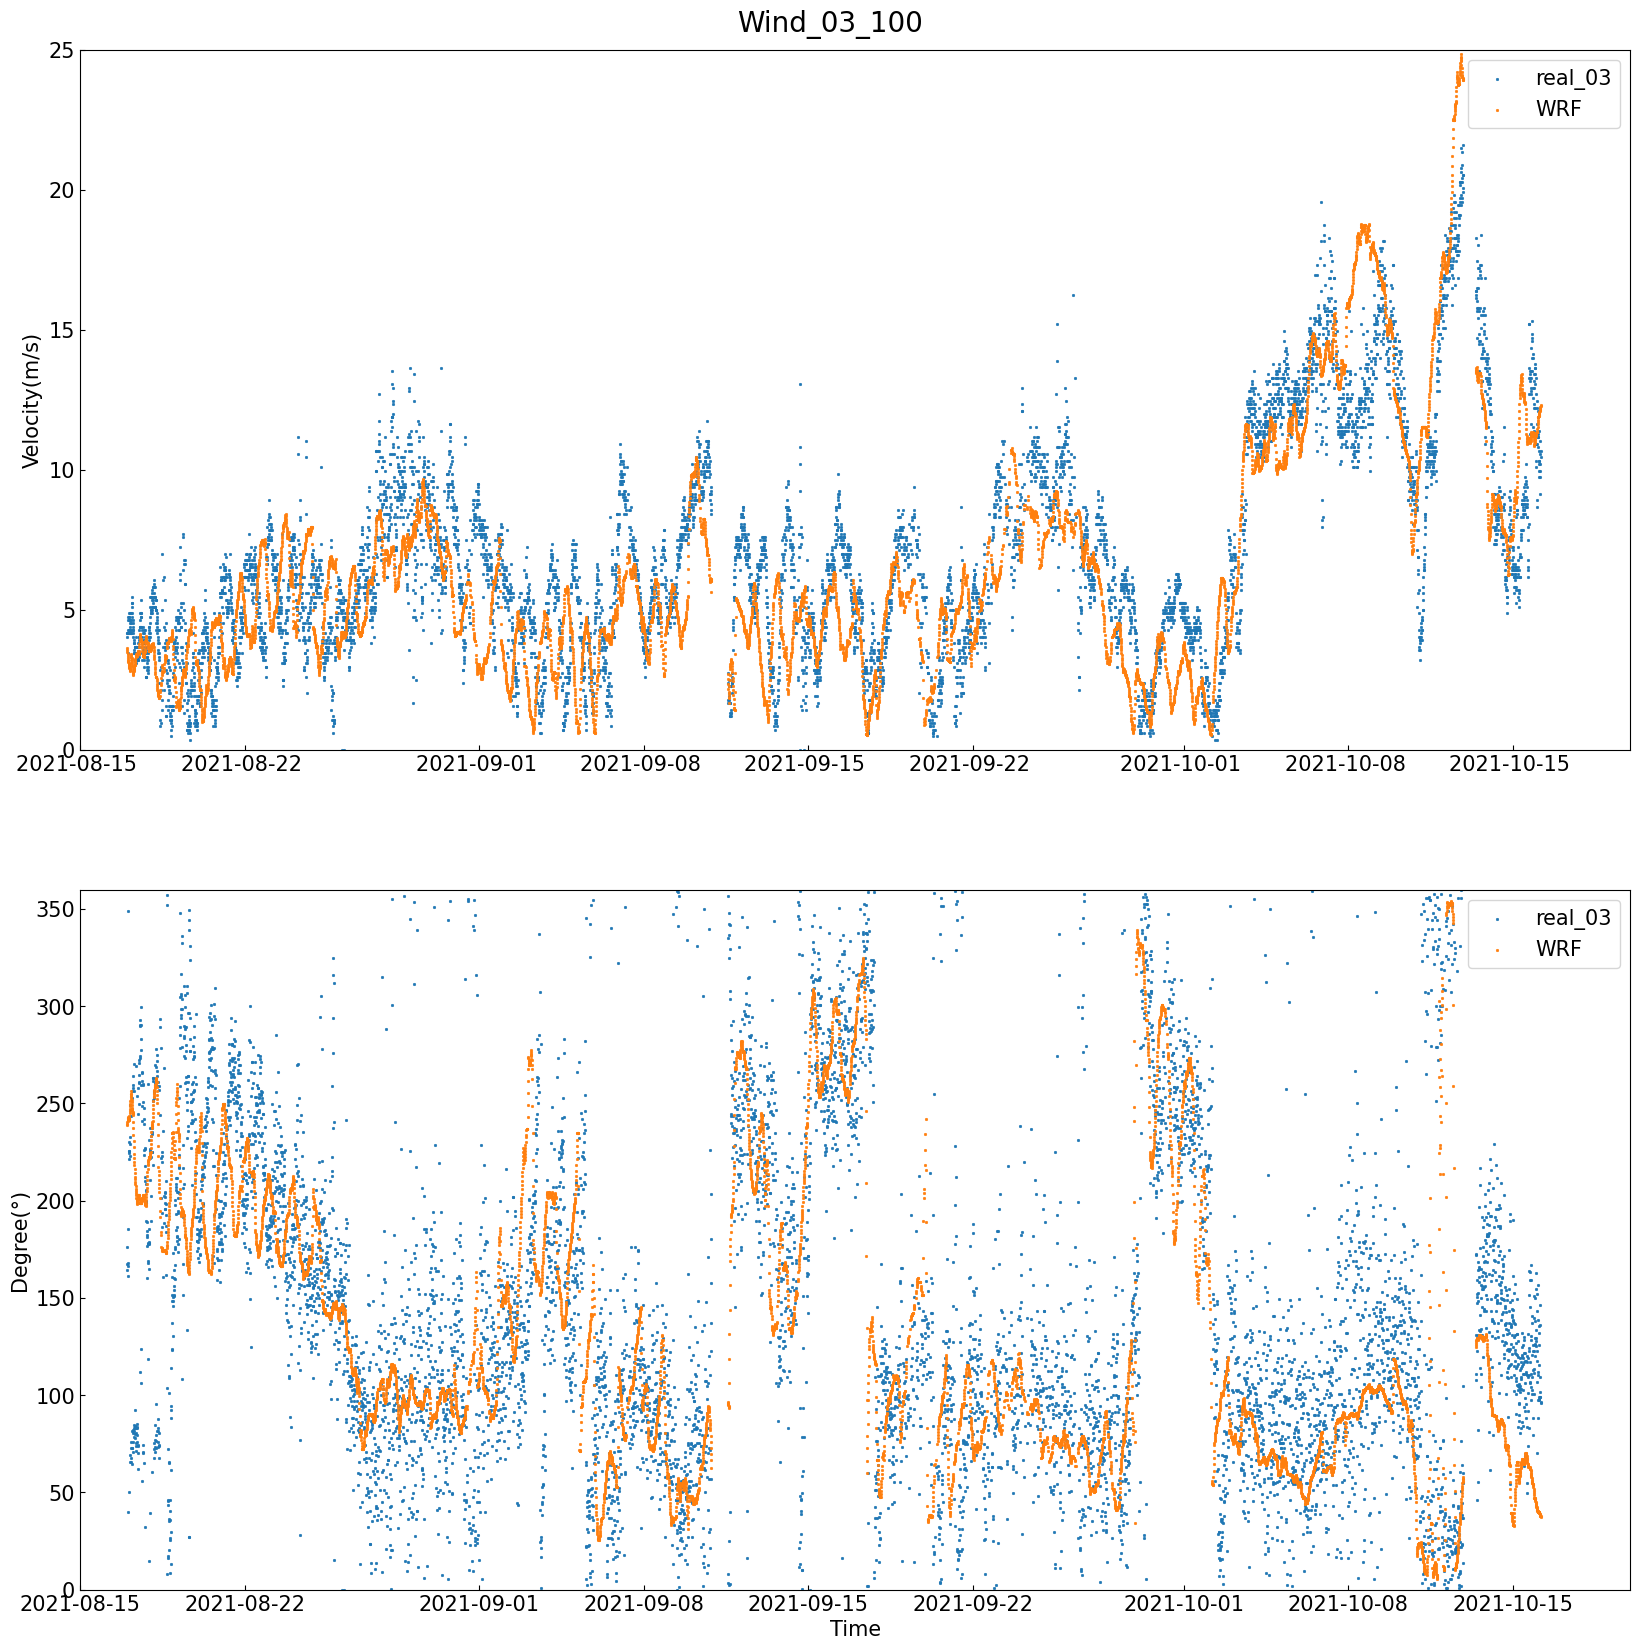

In [24]:
# 选取时间范围
xlim_start_D = pd.Timestamp('2021-08-15')
xlim_end_D = pd.Timestamp('2021-10-20')
# 设置画布大小
figsize = (20, 8)
# 创建画布
plt.figure(figsize = figsize)
# 将画布划分为1行4列
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(figsize[0], figsize[0] / 2 * nrows))
## 全局设置
# 绘制第一幅图
axes[0].scatter(target_velocity_03.index, target_velocity_03.values, s=size, linewidth=line_width, label='real_03')
axes[0].scatter(target_velocity_03.index, velocity10_03, s=size, linewidth=line_width, label='WRF')
axes[0].set_xlim(xlim_start_D, xlim_end_D)
axes[0].set_ylim(0, 25)
axes[0].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d '))
axes[0].autoscale_view()
axes[0].tick_params(direction='in', labelsize=15)
axes[0].set_ylabel('Velocity(m/s)', fontsize=font_size)
axes[0].legend(loc='upper right',fontsize=font_size)

# 绘制第二幅图
axes[1].scatter(target_degree_03.index, target_degree_03.values, s=size, linewidth=line_width, label='real_03')
axes[1].scatter(target_degree_03.index, degree_03, s=size, linewidth=line_width, label='WRF')
axes[1].set_xlim(xlim_start_D, xlim_end_D)
axes[1].set_ylim(0, 360)
axes[1].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
axes[1].autoscale_view()
axes[1].tick_params(direction='in', labelsize=15)
axes[1].set_xlabel('Time', fontsize=font_size)
axes[1].set_ylabel('Degree(°)', fontsize=font_size)
axes[1].legend(loc='upper right',fontsize=font_size)

fig.suptitle('Wind_03_100', fontsize=20, y=0.9) 
plt.savefig('../pic/interp_03_100', dpi=300)
plt.show()